In [ ]:
"""
LSTM 분류기
Yolo - 사진 객체 추출

다음주
- 어텐션, 트랜스포머, BERT, GPT
- 파인튜닝
-> 이미지(cnn), 텍스트(bert, gpt)
- yolo 개인 데이터 객체 추출
- tableau 기초, 대시보드
다음주 이후
html, javascript, flask, db

프로젝트 예정

파이널 프로젝트 기간
- 오전 수업, 오후 프로젝트
- GAN, 강화학습, 메타러닝 등
"""

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
data = pd.read_csv('spam.csv', encoding='latin1') #글자가 깨져서 encoding='latin1'줌

In [3]:
data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [4]:
print('총 샘플의 수 :',len(data))

총 샘플의 수 : 5572


In [5]:
del data['Unnamed: 2']
del data['Unnamed: 3']
del data['Unnamed: 4']

In [6]:
data['v1'] = data['v1'].replace(['ham','spam'],[0,1])#replace([변경전],[변경후])

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   int64 
 1   v2      5572 non-null   object
dtypes: int64(1), object(1)
memory usage: 87.2+ KB


In [8]:
data

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [9]:
print('v2열의 유니크한 값 :',data['v2'].nunique()) #중복이 있는지 확인

v2열의 유니크한 값 : 5169


In [10]:
data.drop_duplicates(subset=['v2'], inplace=True) #중복 제거할때 drop_duplicates쓰면 편하다 

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5169 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5169 non-null   int64 
 1   v2      5169 non-null   object
dtypes: int64(1), object(1)
memory usage: 121.1+ KB


In [12]:
data.groupby('v1') # 0에 해당하는 그룹과 1에해당하는 그룹으로 그룹화

In [13]:
data.groupby('v1').count()

,v2
v1,
0,4516
1,653


In [ ]:
#증식을 통해서 비율맞춰줌

In [14]:
data

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [15]:
X_data = data['v2']
y_data = data['v1']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, 
                                                    random_state=0, stratify=y_data)
#stratify = spam과 ham의 비율을 유지하면서나눠줌 => 층화추출

In [20]:
X_train # 4135
X_test # 1034
y_train # 4135
y_test # 1034

4183    0
108     0
5237    1
1858    0
3603    0
       ..
2086    0
5548    0
2254    0
3593    1
1174    0
Name: v1, Length: 1034, dtype: int64

In [21]:
X_train

1882                     Sorry, I can't help you on this.
4948                    I am in bus on the way to calicut
4460    Thanks again for your reply today. When is ur ...
4851                               I liked your new house
201     Hello darlin ive finished college now so txt m...
                              ...                        
1971                          Enjoy ur life. . Good night
3701    Hey loverboy! I love you !! I had to tell ... ...
2809                 Mm so you asked me not to call radio
1229                      Jus ans me lar. U'll noe later.
2531    What's happening with you. Have you gotten a j...
Name: v2, Length: 4135, dtype: object

In [22]:
tokenizer = Tokenizer() #토크나이즈 객체 생성

In [23]:
# 피팅 = 코퍼스에 있는 텍스트 데이터로부터 토크나이저를 생성
tokenizer.fit_on_texts(X_train)

In [26]:
tokenizer.index_word


{1: 'i',
 2: 'to',
 3: 'you',
 4: 'a',
 5: 'the',
 6: 'u',
 7: 'and',
 8: 'in',
 9: 'is',
 10: 'me',
 11: 'my',
 12: 'for',
 13: 'your',
 14: 'it',
 15: 'of',
 16: 'have',
 17: 'on',
 18: 'call',
 19: 'that',
 20: 'are',
 21: '2',
 22: 'now',
 23: 'so',
 24: 'but',
 25: 'not',
 26: 'can',
 27: 'or',
 28: "i'm",
 29: 'get',
 30: 'at',
 31: 'do',
 32: 'if',
 33: 'be',
 34: 'will',
 35: 'just',
 36: 'with',
 37: 'we',
 38: 'no',
 39: 'this',
 40: 'ur',
 41: 'up',
 42: '4',
 43: 'how',
 44: 'gt',
 45: 'lt',
 46: 'go',
 47: 'when',
 48: 'from',
 49: 'what',
 50: 'ok',
 51: 'out',
 52: 'know',
 53: 'free',
 54: 'all',
 55: 'like',
 56: 'then',
 57: 'got',
 58: 'good',
 59: 'am',
 60: 'time',
 61: 'was',
 62: 'come',
 63: 'its',
 64: 'love',
 65: 'want',
 66: 'text',
 67: 'he',
 68: 'only',
 69: 'there',
 70: 'day',
 71: 'need',
 72: 'going',
 73: 'lor',
 74: 'send',
 75: 'one',
 76: 'as',
 77: 'home',
 78: 'about',
 79: 'back',
 80: 'still',
 81: 'k',
 82: 'see',
 83: 'txt',
 84: 'by',
 85: 

In [27]:
tokenizer.word_counts #단어마다 몇개있는지

OrderedDict([('sorry', 101),
             ('i', 1832),
             ("can't", 47),
             ('help', 44),
             ('you', 1644),
             ('on', 404),
             ('this', 258),
             ('am', 171),
             ('in', 664),
             ('bus', 22),
             ('the', 1003),
             ('way', 75),
             ('to', 1679),
             ('calicut', 2),
             ('thanks', 65),
             ('again', 55),
             ('for', 525),
             ('your', 519),
             ('reply', 105),
             ('today', 108),
             ('when', 221),
             ('is', 643),
             ('ur', 256),
             ('visa', 1),
             ('coming', 41),
             ('and', 754),
             ('r', 113),
             ('u', 859),
             ('still', 125),
             ('buying', 5),
             ('gucci', 1),
             ('bags', 2),
             ('my', 551),
             ('sister', 13),
             ('things', 31),
             ('are', 383),
             ('no

In [28]:
len(tokenizer.index_word) #7821

7821

In [30]:
X_train_encoded=tokenizer.texts_to_sequences(X_train) #X_train에 저장되어있는 데이터를 시퀀스로, 인덱스번호로 보여줌
print(X_train_encoded)

[[102, 1, 210, 230, 3, 17, 39], [1, 59, 8, 427, 17, 5, 137, 2, 2326], [157, 180, 12, 13, 98, 93, 47, 9, 40, 3485, 247, 8, 7, 87, 6, 80, 1312, 5, 3486, 7, 2327, 11, 660, 306, 20, 25, 467, 708, 1028, 203, 129, 193, 800, 2328, 23, 1, 144, 71, 2, 111, 78, 43, 2, 130, 11, 800, 186, 122, 1512], [1, 1154, 13, 104, 292], [222, 622, 857, 540, 623, 22, 23, 83, 10, 47, 6, 257, 32, 6, 26, 64, 936, 407], [96, 18, 3487, 937, 76, 69, 9, 146, 183, 168, 251, 12, 3], [1, 52, 661, 248, 801, 7, 2329, 52, 1, 57, 14, 408, 468, 3, 58, 112], [171, 16, 3, 522, 1155, 12, 104, 449], [1, 450, 29, 40, 541, 134, 3488, 9, 523, 74, 14, 180], [709, 223, 115, 1, 390, 2, 89, 3, 25, 2, 89, 10, 13, 1812, 166, 14, 316, 130, 10, 1313, 24, 63, 3489, 10, 23, 157, 12, 3490], [140, 1, 1156, 4, 710, 15, 566, 17, 1314, 349, 80, 711, 624, 119, 28, 35, 1315, 41], [58, 280, 34, 31], [145, 3, 128, 1, 111, 3, 26, 252, 13, 44, 3491, 22, 2, 2330, 25, 173, 24, 32, 349, 469, 1, 26, 230, 172, 10, 52, 24, 47, 3, 31, 33, 173, 3, 20, 281], [3

In [31]:
word_to_index = tokenizer.word_index

In [33]:
len(word_to_index) #7821개의 단어

7821

In [34]:
word_to_index

{'i': 1,
 'to': 2,
 'you': 3,
 'a': 4,
 'the': 5,
 'u': 6,
 'and': 7,
 'in': 8,
 'is': 9,
 'me': 10,
 'my': 11,
 'for': 12,
 'your': 13,
 'it': 14,
 'of': 15,
 'have': 16,
 'on': 17,
 'call': 18,
 'that': 19,
 'are': 20,
 '2': 21,
 'now': 22,
 'so': 23,
 'but': 24,
 'not': 25,
 'can': 26,
 'or': 27,
 "i'm": 28,
 'get': 29,
 'at': 30,
 'do': 31,
 'if': 32,
 'be': 33,
 'will': 34,
 'just': 35,
 'with': 36,
 'we': 37,
 'no': 38,
 'this': 39,
 'ur': 40,
 'up': 41,
 '4': 42,
 'how': 43,
 'gt': 44,
 'lt': 45,
 'go': 46,
 'when': 47,
 'from': 48,
 'what': 49,
 'ok': 50,
 'out': 51,
 'know': 52,
 'free': 53,
 'all': 54,
 'like': 55,
 'then': 56,
 'got': 57,
 'good': 58,
 'am': 59,
 'time': 60,
 'was': 61,
 'come': 62,
 'its': 63,
 'love': 64,
 'want': 65,
 'text': 66,
 'he': 67,
 'only': 68,
 'there': 69,
 'day': 70,
 'need': 71,
 'going': 72,
 'lor': 73,
 'send': 74,
 'one': 75,
 'as': 76,
 'home': 77,
 'about': 78,
 'back': 79,
 'still': 80,
 'k': 81,
 'see': 82,
 'txt': 83,
 'by': 84,
 'da'

In [35]:
tokenizer.word_counts.items() 
#빈도수 낮은 단어는 빼기도한다 모델의 크기도줄이고..

odict_items([('sorry', 101), ('i', 1832), ("can't", 47), ('help', 44), ('you', 1644), ('on', 404), ('this', 258), ('am', 171), ('in', 664), ('bus', 22), ('the', 1003), ('way', 75), ('to', 1679), ('calicut', 2), ('thanks', 65), ('again', 55), ('for', 525), ('your', 519), ('reply', 105), ('today', 108), ('when', 221), ('is', 643), ('ur', 256), ('visa', 1), ('coming', 41), ('and', 754), ('r', 113), ('u', 859), ('still', 125), ('buying', 5), ('gucci', 1), ('bags', 2), ('my', 551), ('sister', 13), ('things', 31), ('are', 383), ('not', 336), ('easy', 20), ('uncle', 12), ('john', 7), ('also', 48), ('has', 79), ('his', 50), ('own', 10), ('bills', 2), ('so', 353), ('really', 71), ('need', 142), ('think', 93), ('about', 126), ('how', 235), ('make', 79), ('money', 52), ('later', 84), ('sha', 4), ('liked', 6), ('new', 100), ('house', 33), ('hello', 45), ('darlin', 14), ('ive', 9), ('finished', 17), ('college', 14), ('now', 360), ('txt', 119), ('me', 614), ('finish', 39), ('if', 297), ('can', 326),

In [36]:
total_cnt = len(word_to_index)

In [37]:
threshold = 2

In [38]:
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

In [40]:
for key, value in tokenizer.word_counts.items(): #키에는 단어가 벨류에는 단어수가 차례로들어가고
    total_freq = total_freq + value
    if(value < threshold): 
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

In [43]:
total_freq #65145전체 모든단어들에대한 빈도수의 총합
rare_cnt #4337
rare_freq#4337

4337

In [44]:
rare_cnt/total_cnt #전체 단어중에서 등장 빈도수가 1인 단어의 비율

0.5545326684567191

In [45]:
(rare_freq/total_freq)*100 #전체 등장 빈도수에서 등장 빈도수가 1인 단어의 등장 비율
#등장 빈도가 매우낮은 단어는 자연어처리에서 제거해버리는수 있음

6.65745644331875

In [46]:
tokenizer_over2 = Tokenizer(num_words=total_cnt-rare_cnt+1) #빈도
tokenizer_over2.fit_on_texts(X_train)

In [47]:
len(tokenizer_over2.index_word)

7821

In [48]:
# 잠깐 간단한 예제로 num words기능 확인
# sentences = [
#     'I love my dog',
#     'I, love my cat',
#     'You love my dog!'
# ]

# tokenizer3 = Tokenizer(num_words=4)

In [49]:
# tokenizer3.fit_on_texts(sentences)
# word_index = tokenizer3.word_index
# word_index #빈도수 높은순으로 되어있는데 넘워즈 4로하면 1~3번까지만 사용하겠다

{'love': 1, 'my': 2, 'i': 3, 'dog': 4, 'cat': 5, 'you': 6}

In [50]:
# seq = tokenizer3.texts_to_sequences(sentences)
# print(word_index)  # {'love': 1, 'my': 2, 'i': 3, 'dog': 4, 'cat': 5, 'you': 6}
# print(seq) #넘워즈 4라고해서 3개만나옴
# 여기까지 num words기능 확인 위한 간단한예제
# 넘워즈 설정해주면 빈도수 높은거 순대로 설정해준만큼 나옴

{'love': 1, 'my': 2, 'i': 3, 'dog': 4, 'cat': 5, 'you': 6}
[[3, 1, 2], [3, 1, 2], [1, 2]]


In [51]:
X_train_encoded

[[102, 1, 210, 230, 3, 17, 39],
 [1, 59, 8, 427, 17, 5, 137, 2, 2326],
 [157,
  180,
  12,
  13,
  98,
  93,
  47,
  9,
  40,
  3485,
  247,
  8,
  7,
  87,
  6,
  80,
  1312,
  5,
  3486,
  7,
  2327,
  11,
  660,
  306,
  20,
  25,
  467,
  708,
  1028,
  203,
  129,
  193,
  800,
  2328,
  23,
  1,
  144,
  71,
  2,
  111,
  78,
  43,
  2,
  130,
  11,
  800,
  186,
  122,
  1512],
 [1, 1154, 13, 104, 292],
 [222,
  622,
  857,
  540,
  623,
  22,
  23,
  83,
  10,
  47,
  6,
  257,
  32,
  6,
  26,
  64,
  936,
  407],
 [96, 18, 3487, 937, 76, 69, 9, 146, 183, 168, 251, 12, 3],
 [1, 52, 661, 248, 801, 7, 2329, 52, 1, 57, 14, 408, 468, 3, 58, 112],
 [171, 16, 3, 522, 1155, 12, 104, 449],
 [1, 450, 29, 40, 541, 134, 3488, 9, 523, 74, 14, 180],
 [709,
  223,
  115,
  1,
  390,
  2,
  89,
  3,
  25,
  2,
  89,
  10,
  13,
  1812,
  166,
  14,
  316,
  130,
  10,
  1313,
  24,
  63,
  3489,
  10,
  23,
  157,
  12,
  3490],
 [140,
  1,
  1156,
  4,
  710,
  15,
  566,
  17,
  1314,
  34

In [52]:
print('메일의 최대 길이 : %d' % max(len(sample) for sample in X_train_encoded))

메일의 최대 길이 : 189


In [53]:
print('메일의 평균 길이 : %f' % (sum(map(len, X_train_encoded))/len(X_train_encoded)))

메일의 평균 길이 : 15.754534


(array([1.390e+02, 1.361e+03, 9.540e+02, 6.010e+02, 4.370e+02, 2.840e+02,
        2.970e+02, 3.580e+02, 5.460e+02, 6.700e+01, 2.700e+01, 1.400e+01,
        1.800e+01, 1.200e+01, 5.000e+00, 1.300e+01, 8.000e+00, 4.000e+00,
        4.000e+00, 1.000e+00, 5.000e+00, 1.000e+00, 2.000e+00, 1.000e+00,
        2.000e+00, 2.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([  2.  ,  20.16,  38.32,  56.48,  74.64,  92.8 , 110.96, 129.12,
        147.28, 165.44, 183.6 , 201.76, 219.92, 238.08, 256.24, 274.4 ,
        292.56, 310.72, 328.88, 347.04, 365.2 , 383.36, 401.52, 419.68,
        437.84, 456.  , 474.16, 492.32, 510.48, 528.64, 546.8 , 564.96,
        583.12, 601.28, 619.44, 637.6 , 655.76, 673.92, 692.08, 710.24,
        728.4 , 

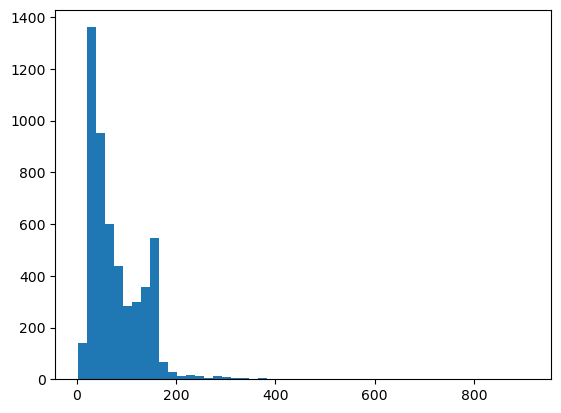

In [54]:
plt.hist([len(sample) for sample in X_data], bins=50) #50개의구간으로 나누어서

In [ ]:
#RNN을 사용하려면 길이를 다맞춰줘야함 메일의 최대길이 189이므로 189로맞출예정

In [55]:
X_train_padded = pad_sequences(X_train_encoded, maxlen =189)

In [56]:
X_train_padded.shape #길이가 189로 맞춰진것을 확인할수 있음

(4135, 189)

In [63]:
from tensorflow.keras.layers import SimpleRNN, Embedding, Dense
from tensorflow.keras.models import Sequential

embedding_dim = 32
hidden_units = 32

In [72]:
vocab_size=len(word_to_index)+1 #패딩 토큰 0번이 사용되므로 1을 더함
vocab_size #단어가 0번이없고 1번부터 7821까지인데 패딩 토큰0번이 사용되므로1을 더해줌

7822

In [73]:
vocab_size #1을 더해줘서 7822가됨

7822

In [75]:
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim)) #7822 -> 32차원
model.add(SimpleRNN(hidden_units))
model.add(Dense(1, activation='sigmoid'))

In [76]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train_padded, y_train, epochs=4, batch_size=64, validation_split=0.2)
# optimizer= 아담이아닌 'rmsprop' 줘봄
# 이진분류이므로 loss='binary_crossentropy'써야함
# x_train_padded데이터에 20퍼정도 나눠서 validation하는거로 씀

Epoch 1/4
52/52 [==============================] - 2s 25ms/step - loss: 0.3756 - acc: 0.8776 - val_loss: 0.2154 - val_acc: 0.9407
Epoch 2/4
52/52 [==============================] - 1s 20ms/step - loss: 0.1476 - acc: 0.9649 - val_loss: 0.1817 - val_acc: 0.9323
Epoch 3/4
52/52 [==============================] - 1s 20ms/step - loss: 0.0728 - acc: 0.9816 - val_loss: 0.0857 - val_acc: 0.9758
Epoch 4/4
52/52 [==============================] - 1s 20ms/step - loss: 0.1216 - acc: 0.9553 - val_loss: 0.1691 - val_acc: 0.9262


In [77]:
X_test

4183    I just really need shit before tomorrow and I ...
108     I know! Grumpy old people. My mom was like you...
5237    Someonone you know is trying to contact you vi...
1858                     Sir, i am waiting for your call.
3603            Hey morning what you come to ask:-) pa...
                              ...                        
2086                  Dude how do you like the buff wind.
5548                   No, I was trying it all weekend ;V
2254                              Ok. Me watching tv too.
3593    Do you want a New Nokia 3510i Colour Phone Del...
1174    Yay! You better not have told that to 5 other ...
Name: v2, Length: 1034, dtype: object

In [ ]:
# 팀원별 메일 제목 / 분류결과 데이터셋 구성
# - 스팸 메일 / 햄 메일 분류기
# - 도착 메일 -> 누구의 메일일까? 자동 분류
# 메일 예민한거 빼고 다 오픈해서 메일제목 스크래핑 

In [97]:
X_test_encoded=tokenizer.texts_to_sequences(X_test)
X_test_padded = pad_sequences(X_test_encoded, maxlen =189)

In [98]:
print("\n 테스트 정확도: %.4f" % (model.evaluate(X_test_padded, y_test)[1]))

33/33 [==============================] - 0s 6ms/step - loss: 0.1756 - acc: 0.9275

 테스트 정확도: 0.9275


In [87]:
X_test_encoded
X_test_encoded.shape

(1034, 189)

In [94]:
X_test[2]
y_test[2]

1

In [89]:
32*33

1056

In [88]:
model.predict(X_test_encoded) #33배치
#0.5기준으로 보다크면 1스팸 작으면0 햄

33/33 [==============================] - 0s 6ms/step


array([[0.01302956],
       [0.01326678],
       [0.98749626],
       ...,
       [0.04057339],
       [0.9914956 ],
       [0.01572474]], dtype=float32)

In [84]:
print(X_test[0])
print(y_test[0])

Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
0


In [ ]:
# "고객님 이번에 세일을 합니다. 방문해주세요"
# -> 토큰화 -> 수치 변환 -> 패딩 -> 모델 입력 ->

# 웹앱형식 서비스

In [ ]:
# 모델에 대한 정성적 평가
# XAI = eXplainable AI

# 스팸/햄 메일 분류기 자동화
# - 데이터 수집 -> 전처리 -> 분석 -> 시각화 -> 모델링 -> 배포 -> 성능개선
# - 기존 모델에 새롭게 수집된 데이터를 추가하여 학습 # 파인튜닝
# -0.01 -> 0, 0.49999

In [99]:
from konlpy.tag import Okt

In [100]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import urllib.request

from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [101]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/bab2min/corpus/master/sentiment/naver_shopping.txt", filename="ratings_total.txt")

('ratings_total.txt', <http.client.HTTPMessage at 0x157b521fd10>)

In [169]:
total_data = pd.read_table('ratings_total.txt', names=['ratings', 'reviews'])

In [171]:
total_data=total_data.head(10000)
total_data

,ratings,reviews
0,5,배공빠르고 굿
1,2,택배가 엉망이네용 저희집 밑에층에 말도없이 놔두고가고
2,5,아주좋아요 바지 정말 좋아서2개 더 구매했어요 이가격에 대박입니다. 바느질이 조금 ...
3,2,선물용으로 빨리 받아서 전달했어야 하는 상품이었는데 머그컵만 와서 당황했습니다. 전...
4,5,민트색상 예뻐요. 옆 손잡이는 거는 용도로도 사용되네요 ㅎㅎ
...,...,...
9995,1,기대를 너무 많이했나봐요 ........ 일단 머릿결 상하신 분은 고민좀 해보세요 ...
9996,5,너무 귀엽고 폭신폭신하고 예뻐요
9997,1,눈뒤에 실거는부분이커서 다뜨고 눈을붙일수가없네요 ㅜ
9998,2,짜증 옷이 뒤틀려서 왔음. 짜증 ㄷ신ㅅㅇㅌㄹ츤ㅅㄴㅅㅌㅅ가ㅡㅡㅎㄱㄴㅅ듣ㅅㄱᆞㄷ쑈는핟ㅎ...


In [172]:
np.select([total_data.ratings>3], [1], default=0)

array([1, 0, 1, ..., 0, 0, 0])

In [173]:
# x=np.arange(10)
# x
# np.select([x<3, x>7], [x**2, x**3], default=999)

In [174]:
total_data['label']=np.select([total_data.ratings>3], [1], default=0)

In [175]:
total_data

,ratings,reviews,label
0,5,배공빠르고 굿,1
1,2,택배가 엉망이네용 저희집 밑에층에 말도없이 놔두고가고,0
2,5,아주좋아요 바지 정말 좋아서2개 더 구매했어요 이가격에 대박입니다. 바느질이 조금 ...,1
3,2,선물용으로 빨리 받아서 전달했어야 하는 상품이었는데 머그컵만 와서 당황했습니다. 전...,0
4,5,민트색상 예뻐요. 옆 손잡이는 거는 용도로도 사용되네요 ㅎㅎ,1
...,...,...,...
9995,1,기대를 너무 많이했나봐요 ........ 일단 머릿결 상하신 분은 고민좀 해보세요 ...,0
9996,5,너무 귀엽고 폭신폭신하고 예뻐요,1
9997,1,눈뒤에 실거는부분이커서 다뜨고 눈을붙일수가없네요 ㅜ,0
9998,2,짜증 옷이 뒤틀려서 왔음. 짜증 ㄷ신ㅅㅇㅌㄹ츤ㅅㄴㅅㅌㅅ가ㅡㅡㅎㄱㄴㅅ듣ㅅㄱᆞㄷ쑈는핟ㅎ...,0


In [176]:
total_data['ratings'].nunique()
total_data['ratings'].value_counts()
#원래 3점이 없었음

5    3995
2    3223
1    1799
4     983
Name: ratings, dtype: int64

In [177]:
total_data['reviews'].nunique()

10000

In [178]:
total_data.drop_duplicates(subset=['reviews'], inplace=True)

In [179]:
train_data, test_data = train_test_split(total_data, test_size = 0.25, random_state = 42)

In [180]:
train_data.label.value_counts()

0    3753
1    3747
Name: label, dtype: int64

In [181]:
# 한글과 공백을 제외한 다른 문자 모두 제거

In [182]:
train_data['reviews']

4901                     두께가 좀 얇네요. 물을 많이 흡수 할 수 있을까 싶어요.
4375    진짜 별로 마감도 별로고 규격이 너무 벌어져서 그사이로 빗물아 다들어감 딱 맞지도 ...
6698                           우리아이가워낙손을마니쓰는편이라금방뜯어버리네요 ㅠ
9805    원래 이런 모양인가요 ? 아무리봐도 덜박은거 같거든요...... 바느질했다가 뜯어진...
1101                      재구매 매주 주말술안주용으로 주문해서 맛있게 먹고있습니다
                              ...                        
5734                      서랍이 정리에 진짜좋아요 깔끔한게 열때마다 기분이 좋아요
5191                                  재구매 네번째 재구매 상품입니다~~
5390    핸드폰으로 주문하다보니 한자 입력이 어려운데 한글로 문구를 적었어도 '삼가 고인의 ...
860                                   사이즈도 정사이즈인거같고 핏도이뻐요
7270    배송지가 삼천포가 아닌 것 같네요~ 매우 실망입니다.. 맛도 1년전에 지인을 통해 ...
Name: reviews, Length: 7500, dtype: object

In [183]:
train_data['reviews']=train_data['reviews'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")#모든 한글과 공백을 빼고 모두 제거

C:\Users\user\AppData\Local\Temp\ipykernel_7488\3911415323.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  train_data['reviews']=train_data['reviews'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")#모든 한글과 공백을 빼고 모두 제거


In [184]:
train_data['reviews'].replace("", np.nan, inplace=True)

In [185]:
train_data.isnull().sum()

ratings    0
reviews    0
label      0
dtype: int64

In [186]:
test_data.drop_duplicates(subset=['reviews'], inplace=True)
test_data['reviews']=test_data['reviews'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
test_data['reviews'].replace("", np.nan, inplace=True)
test_data=test_data.dropna(how='any')

C:\Users\user\AppData\Local\Temp\ipykernel_7488\3229666427.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  test_data['reviews']=test_data['reviews'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")


In [187]:
len(test_data)

2500

In [188]:
test_data

,ratings,reviews,label
6252,5,ㅎㅎ 가격에 비해 저렴하고 좋네요ㅎㅎ다음에 기회가 되면 또 구해 하겟습니다 번창하세...,1
4684,1,배송이 일걸린듯,0
1731,5,너무 좋아요 그리고 좋아요 그리고 좋아요,1
4742,4,검댕이는 묻어나지만 냄새는 다빠졌어요,1
4521,2,별로예요 ㅜㅜ 너무 약해서 한번쓰고 버렸습니다,0
...,...,...,...
4862,1,허리가 말도안되게작아서 못입겠어요,0
7025,1,상품배송할때 제품검수좀 하고 보내세요 의자 발 센치는 옮폭 파여서 왔던데 환불할려다...,0
7647,4,좀 얇다는 점이 아쉽네요,1
7161,4,촉촉하고 건조하지 않습니다 저렴하게 구매해서 만족합니다,1


In [189]:
okt=Okt()

In [190]:
okt.morphs('배송도 빠르네요 가격대비 좋은것 같아요 첨에는 힘들어하나 조금 지나니 잘 하네요')
# 형태소단위로 분리

['배송',
 '도',
 '빠르네요',
 '가격',
 '대비',
 '좋은',
 '것',
 '같아요',
 '첨',
 '에는',
 '힘들어하나',
 '조금',
 '지나니',
 '잘',
 '하네요']

In [191]:
okt.pos('배송도 빠르네요 가격대비 좋은것 같아요 첨에는 힘들어하나 조금 지나니 잘 하네요')
# 형태소단위로 품사에대한 정보가 나옴

[('배송', 'Noun'),
 ('도', 'Josa'),
 ('빠르네요', 'Adjective'),
 ('가격', 'Noun'),
 ('대비', 'Noun'),
 ('좋은', 'Adjective'),
 ('것', 'Noun'),
 ('같아요', 'Adjective'),
 ('첨', 'Noun'),
 ('에는', 'Josa'),
 ('힘들어하나', 'Adjective'),
 ('조금', 'Noun'),
 ('지나니', 'Verb'),
 ('잘', 'Verb'),
 ('하네요', 'Verb')]

In [192]:
train_data, test_data reviews열에서'Noun','Verb' 추출하여 'NV'열에 추가하여 저장

SyntaxError: invalid syntax (548146802.py, line 1)

In [193]:
train_data

,ratings,reviews,label
4901,4,두께가 좀 얇네요 물을 많이 흡수 할 수 있을까 싶어요,1
4375,1,진짜 별로 마감도 별로고 규격이 너무 벌어져서 그사이로 빗물아 다들어감 딱 맞지도 ...,0
6698,2,우리아이가워낙손을마니쓰는편이라금방뜯어버리네요 ㅠ,0
9805,2,원래 이런 모양인가요 아무리봐도 덜박은거 같거든요 바느질했다가 뜯어진 구멍도 보이...,0
1101,5,재구매 매주 주말술안주용으로 주문해서 맛있게 먹고있습니다,1
...,...,...,...
5734,5,서랍이 정리에 진짜좋아요 깔끔한게 열때마다 기분이 좋아요,1
5191,5,재구매 네번째 재구매 상품입니다,1
5390,1,핸드폰으로 주문하다보니 한자 입력이 어려운데 한글로 문구를 적었어도 삼가 고인의 명...,0
860,5,사이즈도 정사이즈인거같고 핏도이뻐요,1


In [194]:
test_data

,ratings,reviews,label
6252,5,ㅎㅎ 가격에 비해 저렴하고 좋네요ㅎㅎ다음에 기회가 되면 또 구해 하겟습니다 번창하세...,1
4684,1,배송이 일걸린듯,0
1731,5,너무 좋아요 그리고 좋아요 그리고 좋아요,1
4742,4,검댕이는 묻어나지만 냄새는 다빠졌어요,1
4521,2,별로예요 ㅜㅜ 너무 약해서 한번쓰고 버렸습니다,0
...,...,...,...
4862,1,허리가 말도안되게작아서 못입겠어요,0
7025,1,상품배송할때 제품검수좀 하고 보내세요 의자 발 센치는 옮폭 파여서 왔던데 환불할려다...,0
7647,4,좀 얇다는 점이 아쉽네요,1
7161,4,촉촉하고 건조하지 않습니다 저렴하게 구매해서 만족합니다,1


In [195]:
len(train_data['reviews'])

7500

In [196]:
train_data['reviews']

4901                       두께가 좀 얇네요 물을 많이 흡수 할 수 있을까 싶어요
4375    진짜 별로 마감도 별로고 규격이 너무 벌어져서 그사이로 빗물아 다들어감 딱 맞지도 ...
6698                           우리아이가워낙손을마니쓰는편이라금방뜯어버리네요 ㅠ
9805    원래 이런 모양인가요  아무리봐도 덜박은거 같거든요 바느질했다가 뜯어진 구멍도 보이...
1101                      재구매 매주 주말술안주용으로 주문해서 맛있게 먹고있습니다
                              ...                        
5734                      서랍이 정리에 진짜좋아요 깔끔한게 열때마다 기분이 좋아요
5191                                    재구매 네번째 재구매 상품입니다
5390    핸드폰으로 주문하다보니 한자 입력이 어려운데 한글로 문구를 적었어도 삼가 고인의 명...
860                                   사이즈도 정사이즈인거같고 핏도이뻐요
7270    배송지가 삼천포가 아닌 것 같네요 매우 실망입니다 맛도 년전에 지인을 통해 삼천포에...
Name: reviews, Length: 7500, dtype: object

In [197]:
# train/test 두개의 데이터 프레임에 대해서 각 문장에 대해 추출한 명사와 동사를 하나의 열 "NV"를 새로 만들어 저장하시는거에요!

In [198]:
stopwords = ['도', '는', '다', '의', '가', '이', '은', '한', '에', '하', '고', '을', '를', '인', '듯', '과', '와', '네', '들', '듯', '지', '임', '게']

In [199]:
train_data['tokenized']=train_data['reviews'].apply(okt.morphs)
train_data['tokenized']=train_data['tokenized'].apply(lambda x: [item for item in x if item not in stopwords])

In [201]:
from collections import Counter #각각의 단어가 빈도수가 어떻게 되는지 출력해줌

In [202]:
list = ['Hello', 'HI', 'How', 'When', 'Where', 'Hello']
Counter(list) # {'hello':2, ...}

Counter({'Hello': 2, 'HI': 1, 'How': 1, 'When': 1, 'Where': 1})

In [207]:
# negative_words = train_data[train_data.label==0]['tokenized'].values # 부정에 해당하는 데이터.
# positive_words = train_data[train_data.label==1]['tokenized'].values # 긍정에 해당하는
# 자료구조가 안맞아서 아래처럼 np.hstack해줌

In [214]:
negative_words = np.hstack(train_data[train_data.label==0]['tokenized'].values)
positive_words = np.hstack(train_data[train_data.label==1]['tokenized'].values)

In [215]:
Counter(negative_words)
negative_word_count = Counter(negative_words)

In [216]:
negative_word_count.most_common(20)

[('안', 617),
 ('요', 594),
 ('너무', 591),
 ('배송', 449),
 ('그냥', 435),
 ('잘', 426),
 ('했는데', 294),
 ('로', 287),
 ('구매', 285),
 ('제품', 283),
 ('못', 280),
 ('으로', 279),
 ('별로', 269),
 ('좀', 264),
 ('하고', 261),
 ('생각', 250),
 ('ㅠㅠ', 243),
 ('사용', 243),
 ('보다', 235),
 ('만', 227)]

In [217]:
Counter(positive_words)
positive_words_count = Counter(positive_words)

In [219]:
positive_words_count.most_common(20) #빈도수 높은 20

[('잘', 768),
 ('좋아요', 684),
 ('배송', 584),
 ('재구매', 472),
 ('너무', 443),
 ('구매', 359),
 ('요', 329),
 ('사용', 258),
 ('가격', 238),
 ('으로', 228),
 ('같아요', 224),
 ('좋네요', 218),
 ('보다', 198),
 ('입니다', 191),
 ('주문', 187),
 ('로', 186),
 ('제품', 183),
 ('빠르고', 177),
 ('때', 173),
 ('더', 166)]

긍정 리뷰의 평균 길이 : 10.81291700026688
부정 리뷰의 평균 길이 : 14.527045030642153


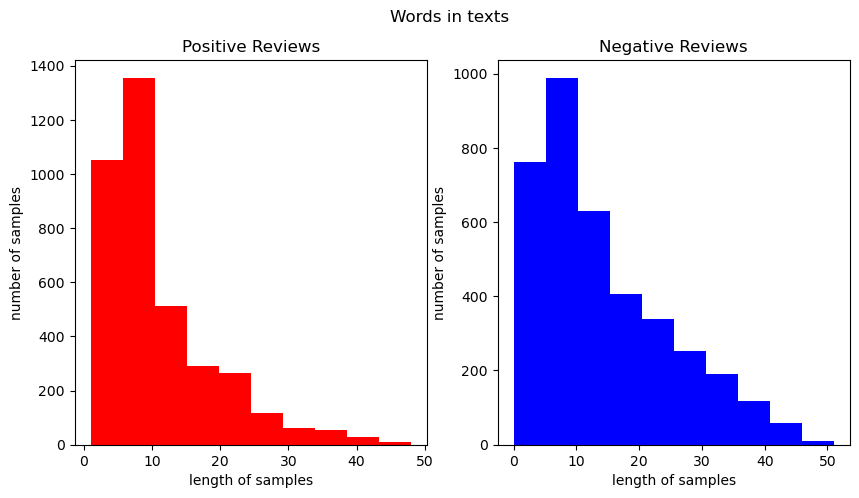

In [220]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,5)) #섭플랏츠 하줄에 두칸
text_len = train_data[train_data['label']==1]['tokenized'].map(lambda x: len(x))
ax1.hist(text_len, color='red')
ax1.set_title('Positive Reviews')
ax1.set_xlabel('length of samples')
ax1.set_ylabel('number of samples')
print('긍정 리뷰의 평균 길이 :', np.mean(text_len))

text_len = train_data[train_data['label']==0]['tokenized'].map(lambda x: len(x))
ax2.hist(text_len, color='blue')
ax2.set_title('Negative Reviews')
fig.suptitle('Words in texts')
ax2.set_xlabel('length of samples')
ax2.set_ylabel('number of samples')
print('부정 리뷰의 평균 길이 :', np.mean(text_len))
plt.show()

In [221]:
test_data['tokenized'] = test_data['reviews'].apply(okt.morphs)
test_data['tokenized'] = test_data['tokenized'].apply(lambda x: [item for item in x if item not in stopwords])

In [222]:
X_train = train_data['tokenized'].values
y_train = train_data['label'].values
X_test= test_data['tokenized'].values
y_test = test_data['label'].values

In [224]:
y_test

array([1, 0, 1, ..., 1, 1, 1])

In [225]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [226]:
tokenizer.word_index

{'잘': 1,
 '너무': 2,
 '배송': 3,
 '요': 4,
 '안': 5,
 '좋아요': 6,
 '재구매': 7,
 '구매': 8,
 '으로': 9,
 '사용': 10,
 '그냥': 11,
 '로': 12,
 '제품': 13,
 '했는데': 14,
 '보다': 15,
 '가격': 16,
 '하고': 17,
 '생각': 18,
 '좀': 19,
 '같아요': 20,
 '주문': 21,
 '입니다': 22,
 '맛': 23,
 '못': 24,
 '때': 25,
 '많이': 26,
 '만': 27,
 '해서': 28,
 '더': 29,
 '별로': 30,
 '것': 31,
 'ㅠㅠ': 32,
 '개': 33,
 '합니다': 34,
 '사이즈': 35,
 '에서': 36,
 '서': 37,
 '상품': 38,
 '거': 39,
 '포장': 40,
 '다른': 41,
 '좋네요': 42,
 '냄새': 43,
 '정말': 44,
 '하나': 45,
 '했어요': 46,
 '부분': 47,
 'ㅠ': 48,
 '진짜': 49,
 '빠르고': 50,
 '조금': 51,
 '할': 52,
 '나': 53,
 '제': 54,
 '넘': 55,
 '저': 56,
 '샀는데': 57,
 '인데': 58,
 '이라': 59,
 '구입': 60,
 '좋습니다': 61,
 '좋은': 62,
 '반품': 63,
 '또': 64,
 '사진': 65,
 '두': 66,
 '정도': 67,
 'ㅎㅎ': 68,
 '해': 69,
 '만족합니다': 70,
 '완전': 71,
 '느낌': 72,
 '아주': 73,
 '좋고': 74,
 '아직': 75,
 '딱': 76,
 '써': 77,
 '아이': 78,
 '맘': 79,
 '다시': 80,
 '엄청': 81,
 '감사합니다': 82,
 '중': 83,
 '면': 84,
 '에요': 85,
 '일': 86,
 '라': 87,
 '그': 88,
 '용': 89,
 '색상': 90,
 '비': 91,
 '디자인': 92,
 '효과': 93,

In [227]:
threshold = 2
total_cnt = len(tokenizer.word_index)
rare_cnt = 0
total_freq = 0
rare_freq = 0

for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 16865
등장 빈도가 1번 이하인 희귀 단어의 수: 10083
단어 집합에서 희귀 단어의 비율: 59.78654017195375
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 10.609663706384948


In [228]:
vocab_size = total_cnt - rare_cnt + 2 #0 패딩 토큰, OOV(out of vocabulary,사전에 없는 단어) 토큰 추가 
print('단어 집합의 크기 :',vocab_size)
# 숫자 2는 패딩토큰사용되는거 하나, OOV하나 해서 2해준거임

단어 집합의 크기 : 6784


In [ ]:
# ex) 나는 오늘(OOV) 학교에 갔습니다
# [0,0,0,..., 5, 1, 10, 50]

In [229]:
tokenizer = Tokenizer(vocab_size, oov_token = 'OOV') 
tokenizer.fit_on_texts(X_train)
# oov_token = 'OOV' 토큰화 과정에서 OOV(사전에없는)에 해당되는 단어는 'OOV'로 표현

In [230]:
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [232]:
X_train
X_test

[[69,
  17,
  447,
  653,
  43,
  69,
  133,
  6755,
  1275,
  65,
  2885,
  5601,
  476,
  130,
  69,
  4367,
  107],
 [4, 87, 1],
 [3, 7, 160, 7, 160, 7],
 [1, 1, 44, 6264],
 [31, 126, 103, 3, 1154, 116, 135, 1541],
 [1, 260, 1, 307],
 [668, 91, 1066],
 [466, 18, 7],
 [76, 164, 3418, 1289, 468, 2, 1754, 21],
 [185, 321, 1, 744, 7],
 [72, 3568, 141, 815],
 [3219, 1, 70, 1042, 434, 580, 13, 466, 35],
 [1744, 1581, 7],
 [1383, 2666, 37, 131, 2, 152, 179, 1, 969, 2, 674, 1, 218],
 [45, 243, 1453, 1702, 917, 2158, 74, 822],
 [375, 280, 511, 3, 1009, 5],
 [1,
  335,
  322,
  1034,
  2691,
  905,
  867,
  1,
  383,
  1549,
  116,
  291,
  1,
  1352,
  871,
  28,
  721,
  1,
  1047,
  234,
  2162,
  6176,
  128],
 [713, 585, 3522, 1, 119, 34, 737, 276, 738],
 [8, 593, 541, 1, 1920, 1, 784, 42, 113, 13, 138, 1878, 5],
 [1520, 290, 304, 1922, 2, 124, 1, 1772, 1, 580, 13],
 [41, 56, 337, 1316, 104, 240, 272, 2318, 255, 6, 4514, 452, 978, 23],
 [540, 364, 493, 4, 1, 165, 1],
 [234, 31, 86, 3, 67

In [233]:
print(tokenizer.word_index) #OOV가 많아서 1번으로 되어있음, 많은단어들이 등록안되어있는듯..

{'OOV': 1, '잘': 2, '너무': 3, '배송': 4, '요': 5, '안': 6, '좋아요': 7, '재구매': 8, '구매': 9, '으로': 10, '사용': 11, '그냥': 12, '로': 13, '제품': 14, '했는데': 15, '보다': 16, '가격': 17, '하고': 18, '생각': 19, '좀': 20, '같아요': 21, '주문': 22, '입니다': 23, '맛': 24, '못': 25, '때': 26, '많이': 27, '만': 28, '해서': 29, '더': 30, '별로': 31, '것': 32, 'ㅠㅠ': 33, '개': 34, '합니다': 35, '사이즈': 36, '에서': 37, '서': 38, '상품': 39, '거': 40, '포장': 41, '다른': 42, '좋네요': 43, '냄새': 44, '정말': 45, '하나': 46, '했어요': 47, '부분': 48, 'ㅠ': 49, '진짜': 50, '빠르고': 51, '조금': 52, '할': 53, '나': 54, '제': 55, '넘': 56, '저': 57, '샀는데': 58, '인데': 59, '이라': 60, '구입': 61, '좋습니다': 62, '좋은': 63, '반품': 64, '또': 65, '사진': 66, '두': 67, '정도': 68, 'ㅎㅎ': 69, '해': 70, '만족합니다': 71, '완전': 72, '느낌': 73, '아주': 74, '좋고': 75, '아직': 76, '딱': 77, '써': 78, '아이': 79, '맘': 80, '다시': 81, '엄청': 82, '감사합니다': 83, '중': 84, '면': 85, '에요': 86, '일': 87, '라': 88, '그': 89, '용': 90, '색상': 91, '비': 92, '디자인': 93, '효과': 94, '분': 95, '있어요': 96, '않고': 97, '대비': 98, '처음': 99, '항상': 100, '마음': 101, '크기': 10

리뷰의 최대 길이 : 51
리뷰의 평균 길이 : 12.671466666666667


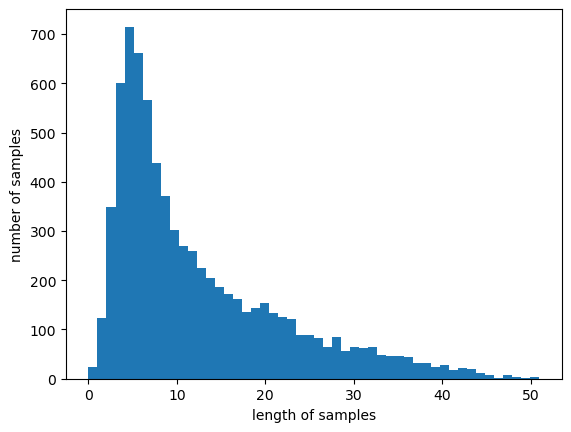

In [234]:
print('리뷰의 최대 길이 :',max(len(l) for l in X_train))
print('리뷰의 평균 길이 :',sum(map(len, X_train))/len(X_train))
plt.hist([len(s) for s in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [235]:
X_train = pad_sequences(X_train, maxlen = 51) #리뷰의 최대길이가 51이다
X_test = pad_sequences(X_test, maxlen = 51)

In [236]:
X_train[1]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,   50,   31,  178,   31, 2345,    3, 4523,   89,  726,
         13, 4524,  119, 4525,   77, 3402,   97,    1, 1056, 1231,   10,
        334,  760, 4526,  203,    3,   27,  188])

In [237]:
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [238]:
model = Sequential() #모델만들고
model.add(Embedding(vocab_size, 100)) #6000~7000차원이었는데 100차원으로해주고
model.add(LSTM(128))
model.add(Dense(1, activation='sigmoid'))

In [239]:
es = EarlyStopping(monitor='val_loss', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

In [240]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=15, callbacks=[es, mc], batch_size=60, validation_split=0.2)

Epoch 1/15
100/100 [==============================] - ETA: 0s - loss: 0.5965 - acc: 0.6808
Epoch 1: val_acc improved from -inf to 0.80267, saving model to best_model.h5
100/100 [==============================] - 7s 52ms/step - loss: 0.5965 - acc: 0.6808 - val_loss: 0.4643 - val_acc: 0.8027
Epoch 2/15
  3/100 [..............................] - ETA: 4s - loss: 0.4254 - acc: 0.8222

C:\Users\user\anaconda3\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


100/100 [==============================] - ETA: 0s - loss: 0.3805 - acc: 0.8580
Epoch 2: val_acc improved from 0.80267 to 0.85000, saving model to best_model.h5
100/100 [==============================] - 5s 45ms/step - loss: 0.3805 - acc: 0.8580 - val_loss: 0.3611 - val_acc: 0.8500
Epoch 3/15
100/100 [==============================] - ETA: 0s - loss: 0.2598 - acc: 0.9045
Epoch 3: val_acc improved from 0.85000 to 0.85533, saving model to best_model.h5
100/100 [==============================] - 4s 43ms/step - loss: 0.2598 - acc: 0.9045 - val_loss: 0.3628 - val_acc: 0.8553
Epoch 4/15
 99/100 [============================>.] - ETA: 0s - loss: 0.2032 - acc: 0.9296
Epoch 4: val_acc did not improve from 0.85533
100/100 [==============================] - 4s 42ms/step - loss: 0.2035 - acc: 0.9293 - val_loss: 0.3704 - val_acc: 0.8493
Epoch 5/15
 99/100 [============================>.] - ETA: 0s - loss: 0.1698 - acc: 0.9428
Epoch 5: val_acc did not improve from 0.85533
100/100 [==================

In [241]:
loaded_model = load_model('best_model.h5')

In [242]:
loaded_model.evaluate(X_test, y_test)[1]

79/79 [==============================] - 1s 13ms/step - loss: 0.4012 - acc: 0.8572


0.857200026512146

In [ ]:
def sentiment_predict(new_sentence):
    #한글, 공백을 제외한 나머지 제거, 토큰화, 불용어 제거, 정수 인코딩, 패딩, 예측
    #구현
    pass

In [243]:
# 이 제품 너무 좋은데요. 정말 좋아요. 강추합니다. => 긍정/부정 출력
# 이것도 상품인가요? 정말 화간 납니다. 분노가 치밀어요. 개짜증납니다 => 긍정/부정 출력
# ex) sentiment_predict('이 제품 너무 좋은데요. 정말 좋아요. 강추합니다. => 긍정/부정 출력')